1 Regularization.

Using the accompanying Hitters dataset, we will explore regression models to predict a player's Salary from other variables. You can use any programming languages or frameworks that you wish.

1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). 
1.1.1. Create a visualization of the coefficient trajectories
1.1.2. Comment on which are the final three predictors that remain in the model
1.1.3. Use cross-validation to find the optimal value of the regularization penalty
1.1.4. How many predictors are left in that model?

1.2 Repeat with Ridge Regression. 
1.2.1 Visualize the coefficient trajectories
1.2.2 Use cross-validation to find the optimal value of the regularization penalty

2 Short Answer. 
2.1 Explain in your own words the bias-variance tradeoff
2.2 What role does regularization play in this tradeoff? 
2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance

In [38]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
import matplotlib.pyplot as plt
%matplotlib inline


###Problem 1
###part 1

In [43]:
##Prolem 1
csvFile="C:/Users/Danielle/Documents/Fall 2018/deep learning/Hitters.csv" 
hitters=pd.read_csv(csvFile,sep=',',encoding='latin1')
#hitters.describe()
hitters = hitters.dropna()
LAS=hitters._get_numeric_data()
X=LAS.drop(['Salary'],axis=1)
X_stand = StandardScaler().fit_transform(X)
Y=LAS['Salary']


(0.0044668359215096348,
 223872.11385683378,
 -446.16176643094383,
 577.26224716427589)

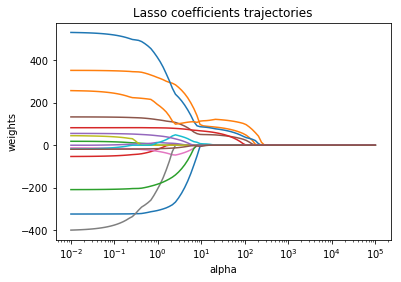

In [44]:
###part 1.1
alphas  = 10**np.linspace(5,-2,100)

lasso = Lasso(max_iter=10000)
l_coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_stand, Y)
    l_coefs.append(lasso.coef_)


ax1 = plt.gca()
ax1.plot(alphas, l_coefs)
ax1.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients trajectories')
plt.axis('tight')

In [45]:
###part 1.2
for c in l_coefs:
    if sum(c!= 0) ==3:
        print(X.columns[c!=0])

Index(['Hits', 'CRuns', 'CRBI'], dtype='object')


In [58]:
###part 1.3
test_size = 0.30
seed = 27
X_train, X_validate, Y_train, Y_validate = train_test_split(X_stand, Y, test_size=test_size, random_state=seed)
lassocv = LassoCV(cv=10, max_iter=100000)
lassocv.fit(X_train, Y_train)

print("The best optimal value for Lasso is", lassocv.alpha_)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_stand, Y)

pd.Series(lasso.coef_, index=X.columns)

The best optimal value for Lasso is 2.94724359824


AtBat     -249.938425
Hits       273.401623
HmRun       -0.000000
Runs         0.000000
RBI          6.466917
Walks      102.545974
Years      -43.370204
CAtBat      -0.000000
CHits        0.000000
CHmRun      45.381175
CRuns      226.738175
CRBI       101.254496
CWalks    -127.552497
PutOuts     78.205138
Assists     26.332580
Errors     -11.265664
dtype: float64

In part 1.4, there are 12 predictors in the model. 


###part 1.2

(0.0044668359215096348,
 223872.11385683378,
 -446.95270062310453,
 574.98965236524475)

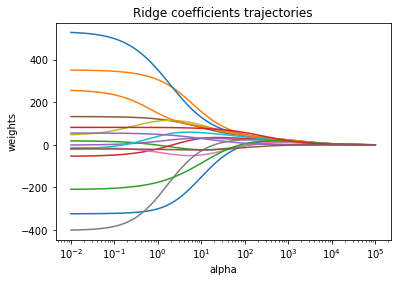

In [61]:
###part 1.2.1
ridge = Ridge()
r_coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_stand, Y)
    r_coefs.append(ridge.coef_)
    
ax2 = plt.gca()
ax2.plot(alphas, r_coefs)
ax2.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients trajectories')
plt.axis('tight')

In [63]:
###part 1.2.2

ridgecv=  RidgeCV(alphas=alphas,  cv=10)
ridgecv.fit(X_train,  Y_train)
print("The best optimal value for Ridge is", ridgecv.alpha_)

ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(X_stand, Y)

pd.Series(ridge.coef_, index=X.columns)

The best optimal value for Ridge is 335.160265094


AtBat      15.393774
Hits       31.983385
HmRun       8.289812
Runs       25.237436
RBI        22.667430
Walks      30.976099
Years      11.388223
CAtBat     25.268553
CHits      32.080673
CHmRun     28.765551
CRuns      32.969751
CRBI       33.270379
CWalks     18.812735
PutOuts    37.189194
Assists     2.995032
Errors     -5.337180
dtype: float64

###Problem 2
###part 1
<br>In the reality, we hardly to get a model with both low bias and low variance, since we try to use sample data to estimate the real data.If we try to keep the accuracy of the training sample data, the bias will decrease, but the model is more flexible with higher variance. It may cause overfitting and the model may have poor performace with real data. On the other hand, If we try to create a more stable model, the variance will decrease with bias increase. It maycause underfitting. So we need to have a balance with bias and variance when we build a model, and choose which is more inportant in a certain situation.
<br>
###part 2
<br>Regularization can come handy when our model is overfitting. regularization will add a norm to limit the range of coefficient estimates that we can select, which increase the stability of model with bias increase, and reduce the variance.
<br>
###part 3
<br>
<br>
In the regularization model, larger alpha will result smaller coefficients which means a higher bias. When alpha equals to 0, the lasso and ridge regression will be cose to the least squares which has low bias, and when alpha is large enough, it gives the null model which all coefficient estimates equal to around zero which has high bias.